In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split


In [3]:
#差分方程  # 生成数据
def nonlinear_system(y1_k, y2_k, u1_k, u2_k, u1_k_1, u2_k_1):
    # 生成噪声
    noise_level = 0.01
    noise1 = np.random.normal(loc=0, scale=np.sqrt(noise_level))
    noise2 = np.random.normal(loc=0, scale=np.sqrt(noise_level))
    # 计算输出
    output1 = y1_k / (1 + y2_k**2) + u1_k + 0.2 * u2_k + 0.4 * u1_k_1 + 0.1 * u2_k_1 + noise1
    output2 = y1_k * y2_k / (1 + y2_k**2) + 0.3 * u1_k + u2_k + 0.1 * u1_k_1 + 0.5 * u2_k_1 + noise2
    return output1, output2


# 参数设置
num_samples = 300
y1_data, y2_data = np.zeros(num_samples), np.zeros(num_samples)

# 初始化初始条件
y1_data[0], y2_data[0] = 1.0, 0.5

# 生成输入数据在[-1, 1]之间
u1_data = np.random.uniform(-1, 1, num_samples)
u2_data = np.random.uniform(-1, 1, num_samples)
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0  # 设置第一个时刻的上一个时刻输入为0

# 生成数据
for k in range(1, num_samples):
    y1_data[k], y2_data[k] = nonlinear_system(y1_data[k-1], y2_data[k-1], u1_data[k], u2_data[k], u1_data_1[k], u2_data_1[k])



In [4]:
# 组合训练数据  多输入单输出
# 假设有训练数据 u1_data, u2_data, y1_data_1 和 y1_data
# 将它们组合成输入特征矩阵 X 和输出标签向量 y
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0
y1_data_1 = np.roll(y1_data, 1)
y1_data_1[0] = 0.3
X = np.column_stack((u1_data, u2_data, u1_data_1, u2_data_1, y1_data_1))
y = y1_data
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)
# print(X.shape)
# print(y.shape)

# print(X_train.shape)
# print(y_train.shape)

# print(X_test.shape)
# print(y_test.shape)



In [5]:
# 组合训练数据  多输入双输出
# 构成训练数据，假设X{u1_data、u2_data、u1_data_1、u2_data_2、y1_data_1、y2_data_1 } 是输入特征，Y{y1_data} 是输出标签
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0  # 设置第一个时刻的上一个时刻输入为0
y1_data_1 = np.roll(y1_data, 1)
y2_data_1 = np.roll(y2_data, 1)
y1_data_1[0], y2_data_1[0] = 0.5, 0.5  # 设置第一个时刻的上一个时刻输入为0.5
X = np.column_stack((u1_data, u2_data, u1_data_1, u2_data_1, y1_data_1, y2_data_1))
y = np.column_stack((y1_data,y2_data))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)


In [6]:
# 测试
# W_b = np.arange(1,(X_train.shape[0]+1)*2+1)

# pr/(W_b.shape)

# mid_indix = W_b.shape[0]//2-1
# pred_0 = W_b[-2:-1]
# W0 = W_b[:mid_indix]
# b1 = W_b[-1:]
# W1 = W_b[mid_indix:mid_indix*2]
# W_b_0 = np.concatenate((W0, pred_0))
# W_b_0 = np.concatenate((W1, b1))

# print(mid_indix)

# print('pred_0:',pred_0.shape)
# print('W0:',W0.shape)
# print('b1:',b1.shape)
# print('W1:',W1.shape)

# # 测试
# W_b = np.arange(1,(X_train.shape[0]+1)*2+1)
# print(W_b.shape)
# W_b2 = np.arange(403,(X_train.shape[0]+1)*2+1+402)
# print(W_b2.shape)
# # 使用 concatenate 连接数组
# W_b3 = np.concatenate((W_b, W_b2))

# # 将一维数组 reshape 为 (402, 2)
# W_b3_reshaped = W_b3.reshape((402, 2))
# print(W_b3_reshaped.shape)


# 测试
# a1 = np.arange(1,6)
# a2 = np.arange(6,11)
# print(a1)
# print(a2)
# print(a1**2)
# print(a2**2)
# print(a1**2 + a2**2)
# print(np.sqrt(a1**2 + a2**2))

# result = np.sum(np.sqrt(a1**2 + a2**2))

# print(result)




In [7]:
# 获取模型参数
def get_params(W_b):

    mid_indix = W_b.shape[0]//2-1
    pred_0 = W_b[-2:-1]
    W0 = W_b[:mid_indix]
    b1 = W_b[-1:]
    W1 = W_b[mid_indix:mid_indix*2]
    W_b_0 = np.concatenate((W0, pred_0))
    W_b_1 = np.concatenate((W1, b1))
    # print(mid_indix)

    # print('pred_0:',pred_0.shape)
    # print('W0:',W0.shape)
    # print('b1:',b1.shape)
    # print('W1:',W1.shape)
    return pred_0,W0,b1,W1,W_b_0,W_b_1


In [8]:
# 训练模型
def model_train(params,X_train, y_train,K_train):
    C0, C1, C00, gamma= params
    
    # 定义 LS-SVR 的目标函数
    def objective(W_b, X, y, C0, C1, C00): 
        b0,W0,b1,W1,W_b_0,W_b_1 = get_params(W_b)
        
        y_pred_0 = np.dot(K_train, W0) + b0
        y_pred_1 = np.dot(K_train, W1) + b1
        # print(X.shape)
        # print(y.shape)
        errors0 = y[:,0] - y_pred_0
        errors1 = y[:,1] - y_pred_1
        # 损失函数
        loss = ( 0.5 * (np.dot(W0, W0)+np.dot(W1, W1)) 
                    + C0 * np.sum(errors0**2) + C1 * np.sum(errors1**2)
                    # + C00 * np.sum(np.sqrt(errors0**2 + errors1**2)) # L2 范数
                    + C00 * np.sum(errors0**2 + errors1**2) # L2 范数的平方
                    )
        return loss
    # 初始化权重向量+偏移项b
    initial_W_b = np.zeros((X_train.shape[0]+1)*2)

    # 使用minimize 函数最小化目标函数
    result = minimize(objective, initial_W_b, args=(X_train, y_train, C0, C1, C00),
                        method='L-BFGS-B')
    # print(result)
    # 输出最优的权重向量
    best_W = result.x

    return best_W


In [9]:
# 优化次数
Times = 20


In [10]:
import numpy as np

def initialize_particles(Particle_num, params_num, Xmin, Xmax, Vmin, Vmax):
    # 初始化粒子群的位置和速度
    positions = np.random.uniform(Xmin, Xmax, size=(Particle_num, params_num))
    velocities = np.random.uniform(Vmin, Vmax, size=(Particle_num, params_num))
    return positions, velocities


def evaluate_fitness(positions, fitness_values, X_train, y_train, X_test, y_test):
    # 在这里计算适应值（均方根误差）
    fitness_values = your_fitness_function(positions, fitness_values, X_train, y_train, X_test, y_test)
    return fitness_values


def update_personal_best(personal_best_positions, personal_best_fitness, positions, fitness_values):
    # 对每个粒子进行循环
    for i in range(len(positions)):
        # 如果当前适应值更好，则更新个体最佳位置和适应值
        if fitness_values[i] < personal_best_fitness[i]:
            personal_best_positions[i] = positions[i].copy()
            personal_best_fitness[i] = fitness_values[i]
    return personal_best_positions, personal_best_fitness



def update_global_best(global_best_position, global_best_fitness, personal_best_positions, personal_best_fitness):
    # 找到所有粒子中适应值最好的粒子的索引
    best_particle_index = np.argmin(personal_best_fitness)
    # 如果该粒子的适应值更好，则更新全局最佳位置和适应值
    if personal_best_fitness[best_particle_index] < global_best_fitness:
        global_best_position[:] = personal_best_positions[best_particle_index].copy()
        global_best_fitness = personal_best_fitness[best_particle_index]
    return global_best_position,global_best_fitness


def update_particles(iteration, iterations_max, positions, velocities, personal_best_positions, global_best_position, 
                    c1, c2, Xmin, Xmax, Vmin, Vmax):
    # 更新粒子的速度和位置
    r1 = np.random.rand(*positions.shape)
    r2 = np.random.rand(*positions.shape)

    w_max = 0.9
    w_min = 0.4
    weight = w_max - iteration*(w_max-w_min)/iterations_max
    # weight = 1
    # 更新速度
    velocities = weight * velocities + c1 * r1 * (personal_best_positions - positions) + c2 * r2 * (global_best_position - positions)
    # 限制范围
    velocities = np.clip(velocities, Vmin, Vmax)
    
    positions = positions + velocities
    # 限制位置范围
    positions = np.clip(positions, Xmin, Xmax)

    return positions, velocities


def pso_algorithm(Particle_num, Xmin, Xmax, Vmin, Vmax, iterations_max, params_num, C1, C2, tao, X_train, y_train, X_test, y_test):
    # 初始化粒子群
    positions, velocities = initialize_particles(Particle_num, params_num, Xmin, Xmax, Vmin, Vmax)

    # 初始化每个粒子的个体最佳位置和适应值
    personal_best_positions = positions.copy()
    personal_best_fitness = np.full(Particle_num, np.inf)#所有元素的值都设置为正无穷
    
    # 初始化全局最佳位置和适应值
    global_best_position = np.zeros(params_num)
    global_best_fitness = np.inf

    fitness_values = np.zeros(Particle_num)
    # 开始迭代
    fitness_values_list = []  # 用于存储每次迭代后的最佳适应值
    for iteration in range(iterations_max):
        print('iteration',iteration)
        # 计算每个粒子的适应值
        fitness_values = evaluate_fitness(positions, fitness_values, X_train, y_train, X_test, y_test)
        
        # 更新个体最佳位置和适应值
        personal_best_positions, personal_best_fitness = update_personal_best(personal_best_positions, personal_best_fitness, positions, fitness_values)
        
        # 更新全局最佳位置和适应值
        global_best_position,global_best_fitness = update_global_best(global_best_position, global_best_fitness, personal_best_positions, personal_best_fitness)
        print(global_best_position,global_best_fitness)
        # 更新粒子的速度和位置
        positions, velocities = update_particles(iteration, iterations_max,positions, velocities, personal_best_positions, global_best_position, C1, C2, Xmin, Xmax, Vmin, Vmax)
        
        # 记录适应度值
        fitness_values_list.append(global_best_fitness)
        
        # 检查收敛精度
        if global_best_fitness < tao:
            break

    # 返回最终的全局最佳位置和适应值
    return global_best_position, global_best_fitness, fitness_values_list

# 替换为你实际的目标函数
def your_fitness_function(positions, fitness_values, X_train, y_train, X_test, y_test):
    for i in range(len(positions)):
        print('i',i)
        params = positions[i]
        C0, C1, C00 ,gamma= params
        K_train = rbf_kernel(X_train, X_train, gamma=gamma) 
        K_test = rbf_kernel(X_test, X_train, gamma=gamma) 

        # 训练模型 输入C ,gamma，输出 best_W
        best_W_b = model_train(params, X_train, y_train, K_train)
        # 模型预测   
        b0,W0,b1,W1,W_b_0,W_b_1 = get_params(best_W_b)
        y_pred_0 = np.dot(K_test, W0) + b0
        y_pred_1 = np.dot(K_test, W1) + b1
        errors0 = y_test[:,0] - y_pred_0
        errors1 = y_test[:,1] - y_pred_1

        
        # 定义适应度函数
        # mse = (np.sqrt(np.sum(errors0**2)/K_test.shape[0])
        #         +np.sqrt(np.sum(errors1**2)/K_test.shape[0]))
        
        mse = np.sqrt(np.sum(errors0**2+errors1**2)/K_test.shape[0])
                

        fitness_values[i] = mse
        print("mse",mse)
    
    return fitness_values



# position = [C0, C1, C00 ,gamma]
# 调用粒子群算法
vel = 1
result_position, result_fitness, fitness_values_list = pso_algorithm(Particle_num = 5, Xmin=0, Xmax=100, Vmin=-vel, Vmax=vel, 
                                                iterations_max=20, params_num = 4, C1=2, C2=2, tao=0.1, 
                                                X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# 输出结果
print(f"Global Best Position: {result_position}")
print(f"Global Best Fitness: {result_fitness}")
# [7.65104944e+01 7.89785351e+01 4.62360612e+01 5.28185433e-02]
params = result_position
C0, C1, C00 ,gamma= params
K_train = rbf_kernel(X_train, X_train, gamma=gamma) 
K_test = rbf_kernel(X_test, X_train, gamma=gamma) 

# 训练模型 输入C ,gamma，输出 best_W
best_W_b = model_train(params, X_train, y_train, K_train)
# 模型预测   
b0,W0,b1,W1,W_b_0,W_b_1 = get_params(best_W_b)
y_pred_0 = np.dot(K_test, W0) + b0
y_pred_1 = np.dot(K_test, W1) + b1
errors0 = y_test[:,0] - y_pred_0
errors1 = y_test[:,1] - y_pred_1


#1.25s


iteration 0
i 0
mse 1.3821920767335918
i 1
mse 1.3822825629146653
i 2
mse 1.3823114257153475
i 3
mse 1.3823140968945038
i 4
mse 1.3803440959476951
[17.53586412 61.5190326  79.94865359 23.34159055] 1.3803440959476951
iteration 1
i 0
mse 1.38216324779549
i 1
mse 1.3822739022497361
i 2
mse 1.3823118673164376
i 3
mse 1.382313993440711
i 4
mse 1.380062167613243
[16.94100548 62.07196592 79.71182414 22.68619917] 1.380062167613243
iteration 2
i 0
mse 1.3821285774254624
i 1
mse 1.3822301108589428
i 2
mse 1.382279909380264
i 3
mse 1.3823139564135487
i 4
mse 1.3797822050685646
[16.42050418 62.55578257 79.50459836 22.11273172] 1.3797822050685646
iteration 3
i 0
mse 1.3820861449549982
i 1
mse 1.3822503352314774
i 2
mse 1.382313149846019
i 3
mse 1.3822791376329309
i 4
mse 1.379515618552571
[15.97807806 62.96702673 79.32845645 21.62528439] 1.379515618552571
iteration 4
i 0
mse 1.382034141593279
i 1
mse 1.3822347002440951
i 2
mse 1.3823133779557322
i 3
mse 1.3822791395007985
i 4
mse 1.3792750005088763

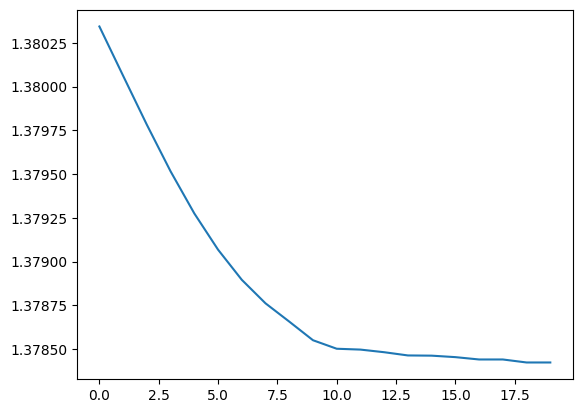

In [11]:
plt.plot(fitness_values_list)


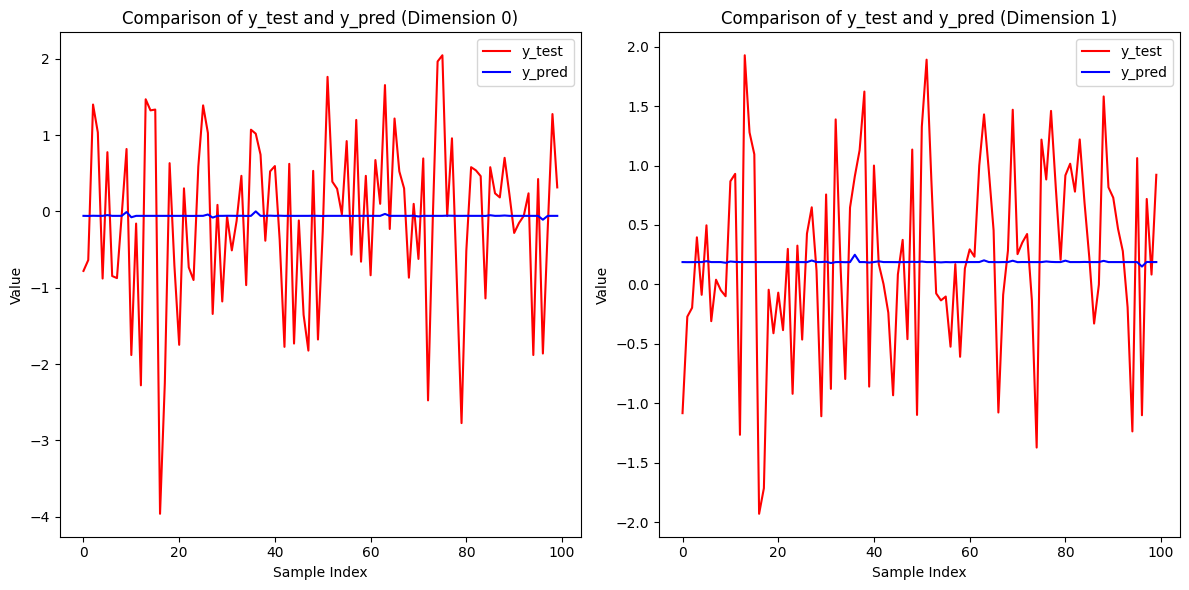

In [13]:
# 自定义优化结果
# 创建两个子图，分别绘制每个维度
plt.figure(figsize=(12, 6))

# 第一个维度的曲线
plt.subplot(1, 2, 1)
plt.plot(y_test[:, 0], 'r-', label='y_test')
plt.plot(y_pred_0, 'b-', label='y_pred')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 0)')
plt.legend()

# 第二个维度的曲线
plt.subplot(1, 2, 2)
plt.plot(y_test[:, 1], 'r-', label='y_test')
plt.plot(y_pred_1, 'b-', label='y_pred')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 1)')
plt.legend()

# 调整子图布局
plt.tight_layout()
plt.show()
